In [1]:
%matplotlib inline
import math
import numpy as np
import numpy.random as nrand
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Simulation

In [2]:
from stockmarket import baselinemodel

In [4]:
#%prun baselinemodel.stockMarketSimulation(seed=0, simulation_time=10, amount_momentum=40, amount_mean_reversion=40, amount_firms=1,initial_money=(100, 200),initial_bid_ask=(1,1), initial_memory=(3,7),initial_ma_short=(2,3), initial_ma_long=(6,7),initial_profit=(200,200),initial_book_value=(10000, 10000),initial_stock_amount=400,order_expiration_time=120,init_propensity_to_switch=1.1,init_price_to_earnings_window=(6, 12),firm_profit_mu=0.058,firm_profit_delta=0.00396825396,firm_profit_sigma=0.125,printProgress=False)

In [5]:
agents, firms, stocks, order_books = baselinemodel.stockMarketSimulation(seed=0, simulation_time=100,
                                                                         amount_momentum=40,
                                                                         amount_mean_reversion=40, amount_firms=1,
                                                                         initial_money=(100, 200),
                                                                         initial_bid_ask=(1,1), initial_memory=(3,7),
                                                                         initial_ma_short=(2,3), initial_ma_long=(6,7),
                                                                         initial_profit=(200,200),
                                                                         initial_book_value=(10000, 10000),
                                                                         initial_stock_amount=400,
                                                                         order_expiration_time=120,
                                                                         init_propensity_to_switch=1.1,
                                                                         init_price_to_earnings_window=(6, 12),
                                                                         firm_profit_mu=0.058,
                                                                         firm_profit_delta=0.00396825396,
                                                                         firm_profit_sigma=0.125,
                                                                         printProgress=False
                                                                         )

# Quick results

## Firm profits

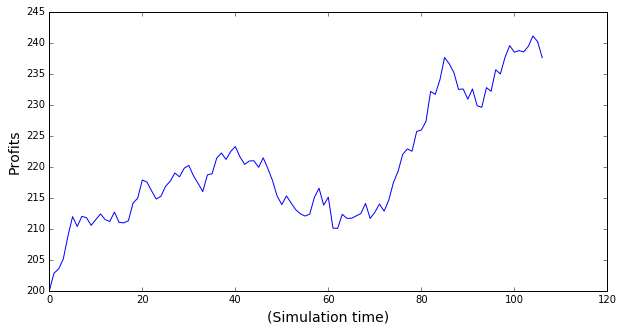

In [10]:
profits = firms[0].profit_history

fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(range(len(profits)), profits)

ax1.set_ylabel('Profits', fontsize='14')
ax1.set_xlabel('(Simulation time)', fontsize='14')

# Market Prices and Volume

In [12]:
prices = order_books[0].transaction_prices_history
prices

[]

In [14]:
volume = order_books[0].transaction_volumes_history
#volume

# Strategy switching

In [27]:

#str(agents[0].function_history[0])
percentageMomentum(0, agents)

0.5

In [26]:
def percentageMomentum(period, agents):
    momentum = 0
    queryString = 'momentum'
    for agent in agents:
        function = str(agent.function_history[period])
        if queryString in function:
            momentum += 1
    return momentum / (len(agents))

In [29]:
percFund = []
for period in range(100):
    percFund.append(percentageMomentum(period, agents))

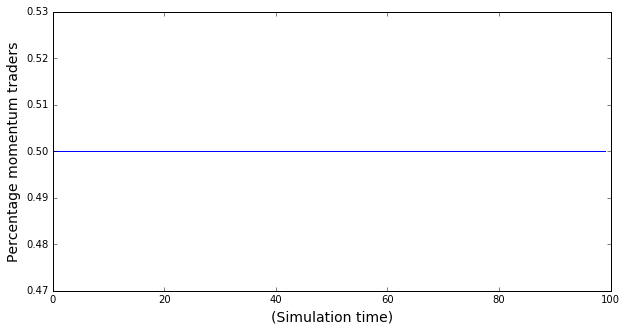

In [30]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

ax1.plot(range(len(percFund)), percFund)

ax1.set_ylabel('Percentage momentum traders', fontsize='14')
ax1.set_xlabel('(Simulation time)', fontsize='14')

# Other stuff

In [3]:
# simulate geometric brownian motion
def geometricBrownianPrice(previousPrice, delta, sigma, mu):
    sqrt_delta_sigma = math.sqrt(delta) * sigma
    brownian_motion = nrand.normal(loc=0, scale=sqrt_delta_sigma)
    sigma_pow_mu_delta = (mu - 0.5 * math.pow(sigma, 2.0)) * delta
    geometric_brownian_motion_log_return = brownian_motion + sigma_pow_mu_delta
    retur = np.exp(geometric_brownian_motion_log_return)
    nextPrice = previousPrice * retur
    return nextPrice

In [4]:
delta = 0.00396825396
sigma = 0.125
mu = 0.058
time = 999

In [5]:
prices = [100]
for t in range(time):
    prices.append(geometricBrownianPrice(prices[-1], delta, sigma, mu))

In [6]:
convex = [1]
for t in range(100):
    previous = convex[-1]
    convex.append(previous * 2)


In [7]:
concave = [1]
for t in range(100):
    previous = concave[-1]
    concave.append(concave[0] + previous * 0.75)
#concave

In [8]:
smoothedPrices = savitzky_golay(np.array(prices),199,1)

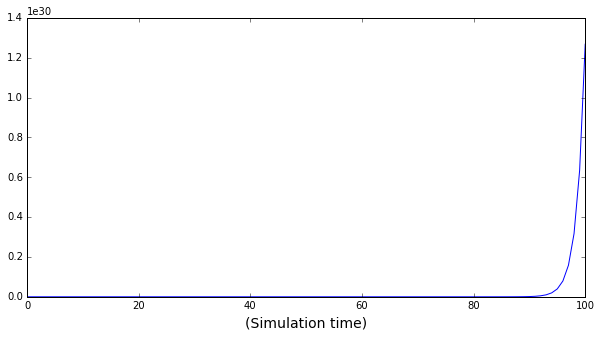

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# ax1.plot(range(len(prices)), prices)
# ax1.plot(range(len(prices)), smoothedPrices)
ax1.plot(range(len(convex)), convex)

ax1.set_xlabel('(Simulation time)', fontsize='14')

# Momentum

In [16]:
shortMA = 20
longMA = 200
upperThreshold = 1.05
lowerThreshold = 0.95

In [17]:
goingUp = prices[:400]

In [18]:
short_ma = sum(goingUp[-shortMA:]) / shortMA
long_ma = sum(goingUp[-longMA:]) / longMA
short_ma / long_ma

1.0803195987941825

In [19]:
short_ma = sum(prices[-shortMA:]) / shortMA
long_ma = sum(prices[-longMA:]) / longMA
short_ma / long_ma

0.99832930053493041

In [39]:
def momentum(prices, shortMA, longMA, upper_threshold, lower_threshold):
    """Depending on stocks momentum buy, sell or hold the stock"""
    short_ma = sum(prices[(len(prices)-shortMA):]) / shortMA
    long_ma = sum(prices[(len(prices)-longMA):]) / longMA
    print('shortMA', short_ma)
    print('longMA', long_ma)
    momentum = short_ma / long_ma
    print(momentum)
    if momentum > upper_threshold:
        return 'buy'
    elif momentum < lower_threshold:
        return 'sell'
    else:
        return 'hold'

In [41]:
momentum(concave, shortMA, 200, upperThreshold, lowerThreshold) 

shortMA 3.999999999954633
longMA 1.9462500000000147
2.055234425153296


'buy'

In [45]:
momentum(goingUp, shortMA, 200, upperThreshold, lowerThreshold) 

shortMA 289.5
longMA 199.5
1.4511278195488722


'buy'

In [46]:
goingUp = [x for x in range(300)]
goingDown = [x for x in reversed(goingUp)]
goingDown

[299,
 298,
 297,
 296,
 295,
 294,
 293,
 292,
 291,
 290,
 289,
 288,
 287,
 286,
 285,
 284,
 283,
 282,
 281,
 280,
 279,
 278,
 277,
 276,
 275,
 274,
 273,
 272,
 271,
 270,
 269,
 268,
 267,
 266,
 265,
 264,
 263,
 262,
 261,
 260,
 259,
 258,
 257,
 256,
 255,
 254,
 253,
 252,
 251,
 250,
 249,
 248,
 247,
 246,
 245,
 244,
 243,
 242,
 241,
 240,
 239,
 238,
 237,
 236,
 235,
 234,
 233,
 232,
 231,
 230,
 229,
 228,
 227,
 226,
 225,
 224,
 223,
 222,
 221,
 220,
 219,
 218,
 217,
 216,
 215,
 214,
 213,
 212,
 211,
 210,
 209,
 208,
 207,
 206,
 205,
 204,
 203,
 202,
 201,
 200,
 199,
 198,
 197,
 196,
 195,
 194,
 193,
 192,
 191,
 190,
 189,
 188,
 187,
 186,
 185,
 184,
 183,
 182,
 181,
 180,
 179,
 178,
 177,
 176,
 175,
 174,
 173,
 172,
 171,
 170,
 169,
 168,
 167,
 166,
 165,
 164,
 163,
 162,
 161,
 160,
 159,
 158,
 157,
 156,
 155,
 154,
 153,
 152,
 151,
 150,
 149,
 148,
 147,
 146,
 145,
 144,
 143,
 142,
 141,
 140,
 139,
 138,
 137,
 136,
 135,
 134,
 133

# Mean reversion

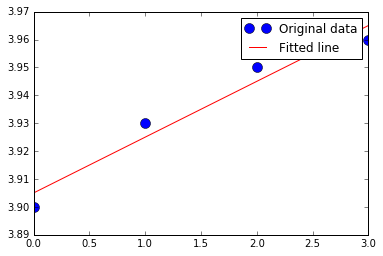

In [136]:
# identify trend in data 
x = np.array([0, 1, 2, 3])
y = np.array([3.9, 3.93, 3.95, 3.96])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [22]:
mean_reversion(prices, shortMA, upperThreshold, lowerThreshold)

[  99.12107406   99.26436773   99.4076614    99.55095507   99.69424874
   99.83754241   99.98083608  100.12412975  100.26742342  100.41071709
  100.55401076  100.69730443  100.8405981   100.98389178  101.12718545
  101.27047912  101.41377279  101.55706646  101.70036013  101.8436538 ]
[97.303050448053398, 97.383282536989427, 98.29102090135693, 98.917122832780365, 99.701585627634515, 100.97765247716808, 100.29290813025608, 100.70288816845013, 101.92906353416394, 102.24568836697237, 101.1725786334252, 101.15635885226227, 101.59323447309595, 103.06107763851924, 102.97530141211099, 102.10544385655608, 101.57234136002741, 99.664360862799455, 99.283311248573085, 99.319007202611843]


'hold'

In [43]:
mean_reversion(concave, shortMA=20, upper_threshold=1.0, lower_threshold=1.0)

[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.]
[3.999999999772447, 3.999999999829335, 3.9999999998720015, 3.9999999999040012, 3.9999999999280007, 3.9999999999460005, 3.9999999999595004, 3.999999999969625, 3.999999999977219, 3.999999999982914, 3.9999999999871854, 3.999999999990389, 3.9999999999927915, 3.9999999999945937, 3.9999999999959455, 3.999999999996959, 3.999999999997719, 3.9999999999982894, 3.999999999998717, 3.9999999999990377]


'buy'

In [12]:
def mean_reversion(prices, shortMA, upper_threshold, lower_threshold):
    """Depending on the stocks trend buy or sell"""
    # identify trend based on linear regression
    prices = prices[(len(prices)-shortMA):]
    t = np.array(range(len(prices)))
    A = np.vstack([t, np.ones(len(t))]).T
    # estimate linear regression
    m, c = np.linalg.lstsq(A, prices)[0]
    trend = m*t + c
    print(trend)
    print(prices)
    if trend[-1] / prices[-1] > upper_threshold:
        return 'buy'
    elif trend[-1] / prices[-1] < lower_threshold:
        return 'sell'
    else:
        return 'hold'
     
#     stockPriceHistory = len(stock.price_history)
#     if stockPriceHistory < shortMA+1:
#         return None
#     else:
#         ma = sum(prices[-shortMA:]) / shortMA
#         growth = ma - sum(prices[-shortMA-1:-1]) / shortMA
#         predicted = ma + (shortMA/2+0.5)*growth
#         if predicted > :
#             return 'sell'
#         else:
#             return 'buy'
